# Assignment for Business Analyst Intern @Jar

## Walmart Sales Analysis
   You have been given a data set to analyse and answer the following questions:
Candidate can answer the questions by using any technical tool (Excel, Sheets,
Python, etc..)

*Data Set: Walmart Sales [Kindly find an attached copy in the email]*

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [22]:
warnings.filterwarnings('ignore') # ignore warnings

## A. Analyze the performance of sales and revenue at the city and branch level ( 5 marks)

Provided dataset is in the Excel (`*.xlsx`) file format. Use `pandas.read_excel` to read this dataset into `DataFrame`

In [23]:
df = pd.read_excel("/Users/khushbu/Downloads/Walmart_Sales_CB1799BACC_77EAC63B5D.xlsx")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1


### Initial Analysis  
Let's begin with a comprehensive analysis of the data.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


#### Data Overview

The dataset contains 12 columns and 1,000 rows. Let's check for any null values.

In [25]:
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

From above, it is clear that the dataset does not contain any null values. 

Now, check for unique entities in each of the columns.

In [26]:
df.nunique()

Invoice ID       1000
Branch              3
City                3
Customer type       2
Gender              2
Product line        6
Unit price        943
Quantity           10
Date               89
Time              506
Payment             3
Rating             61
dtype: int64

The dataset includes information from 3 different branches and 3 distinct cities.

To analyze performance, we need to calculate the total sales (sum of quantity) and revenue (sum of UnitPrice * Quantity) at both the city and branch levels. This will provide insights into the sales and financial performance across different locations. 

In [27]:
# add new column "Revenue"
df['Revenue'] = df['Unit price'] * df['Quantity']  

In [28]:
# display few row of dataframe
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


In [29]:
# i am doing Group by City and Branch, then aggregating  the sales and revenue
city_branch_sales = df.groupby(['City', 'Branch']).agg(total_sales=('Quantity', 'sum'),total_revenue=('Revenue', 'sum')).reset_index()
city_branch_sales

,City,Branch,total_sales,total_revenue
0,Mandalay,A,637,34130.09
1,Mandalay,B,664,37215.93
2,Mandalay,C,519,29794.62
3,Naypyitaw,A,648,35985.64
4,Naypyitaw,B,604,35157.75
5,Naypyitaw,C,579,34160.14
6,Yangon,A,598,33647.27
7,Yangon,B,631,35193.51
8,Yangon,C,630,32302.43


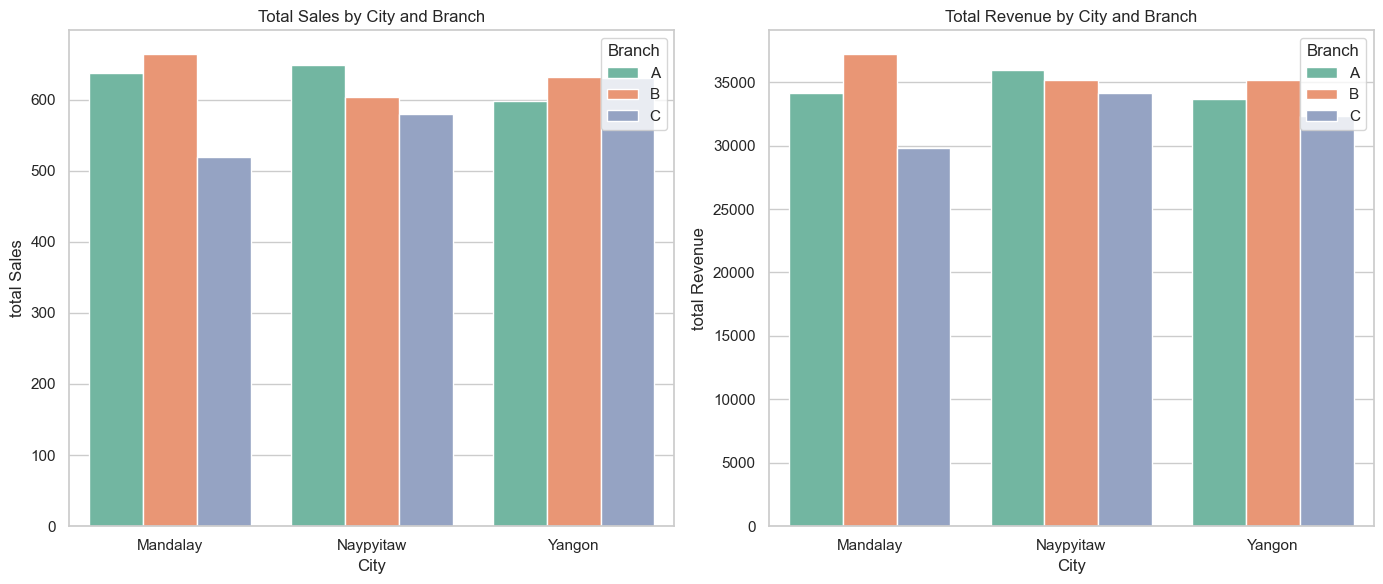

In [30]:
# Set up the seaborn style
sns.set(style="whitegrid")

# Create a figure to contain multiple subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Total Sales by City and Branch
sns.barplot(x='City', y='total_sales', hue='Branch', data=city_branch_sales, ax=ax[0], palette="Set2")
ax[0].set_title('Total Sales by City and Branch')
ax[0].set_ylabel('total Sales')

# Plot 2: Total Revenue by City and Branch
sns.barplot(x='City', y='total_revenue', hue='Branch', data=city_branch_sales, ax=ax[1], palette="Set2")
ax[1].set_title('Total Revenue by City and Branch')
ax[1].set_ylabel('total Revenue')

# Show the plots
plt.tight_layout()
plt.show()

Both plots help in comparing performance at the city and branch level, with clear separation of sales and revenue data for easy interpretation.

## B. What is the average price of an item sold at each branch of the city (10 marks)

Calculate the average price of an item at each branch of city, we can group by City and Branch, and then calculate the mean of Unit price.

In [31]:
# Group by City and Branch, then calculate the average price of items
avg_price_per_branch = df.groupby(['City', 'Branch']).agg(avg_price=('Unit price', 'mean')).reset_index()

In [32]:
avg_price_per_branch

,City,Branch,avg_price
0,Mandalay,A,53.353866
1,Mandalay,B,56.133305
2,Mandalay,C,57.958316
3,Naypyitaw,A,54.123182
4,Naypyitaw,B,57.785688
5,Naypyitaw,C,57.941009
6,Yangon,A,55.639298
7,Yangon,B,56.011062
8,Yangon,C,52.684602


## C. Analyze the performance of sales and revenue, Month over Month across theProduct line, Gender, and Payment Method, and identify the focus areas toget better sales for April 2019. (15 marks)

### To Analyze the performance of sales and revenue, Month over Month we need to Extract the month and year from the Date column.


In [33]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [34]:
# Extract Month and Year from 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [35]:
df.head(15)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Revenue,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,522.83,1,2019
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,76.40,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,324.31,3,2019
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,465.76,1,2019
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,604.17,2,2019
5,699-14-3026,B,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,2019-03-25,18:30:00,Ewallet,4.1,597.73,3,2019
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,2019-02-25,14:36:00,Ewallet,5.8,413.04,2,2019
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,2019-02-24,11:38:00,Ewallet,8.0,735.60,2,2019
8,665-32-9167,B,Yangon,Member,Female,Health and beauty,36.26,2,2019-01-10,17:15:00,Credit card,7.2,72.52,1,2019
9,692-92-5582,A,Mandalay,Member,Female,Food and beverages,54.84,3,2019-02-20,13:27:00,Credit card,5.9,164.52,2,2019


In [36]:
# Group data by Product line, Gender, Payment, and Month to calculate total revenue
grouped = df.groupby(['Product line', 'Gender', 'Payment', 'Month']).agg({'Revenue': 'sum', 'Quantity': 'sum'}).reset_index()


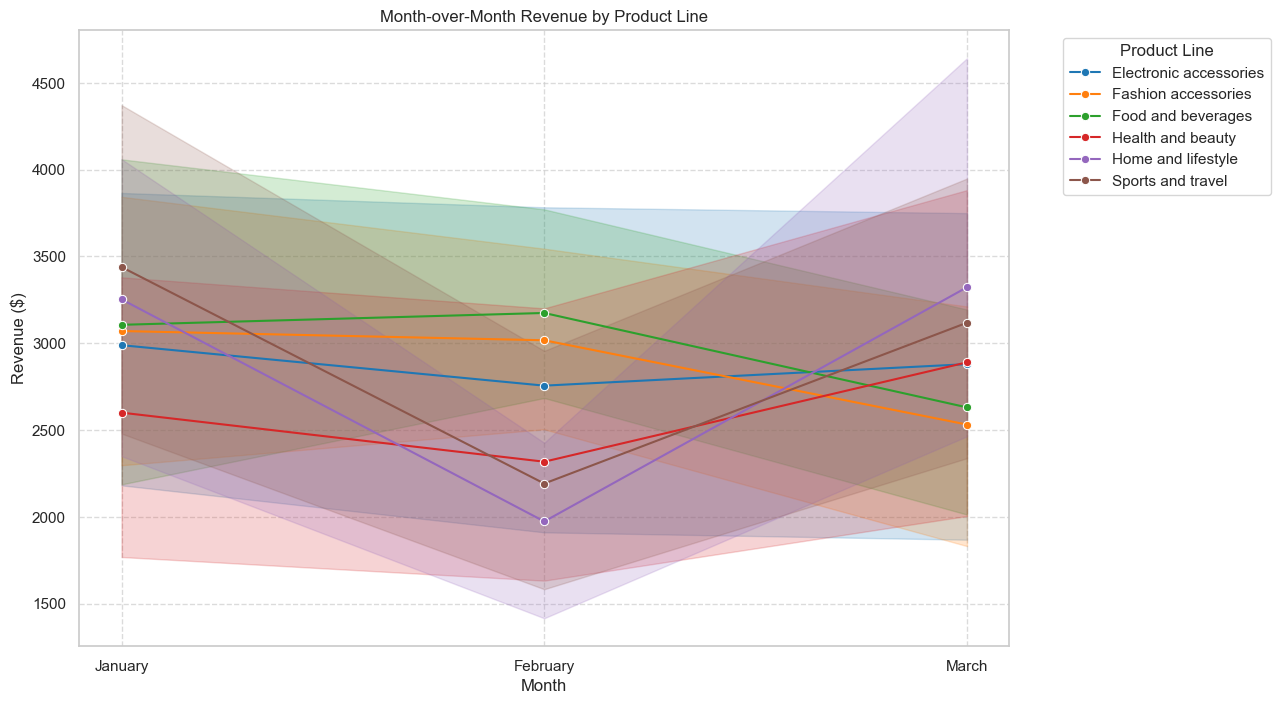

In [37]:
#Set up the figure for multiple subplots
plt.figure(figsize=(12,8))

# Line plot for Revenue by Product Line
sns.lineplot(data=grouped, x='Month', y='Revenue', hue='Product line', marker='o', palette='tab10')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.title('Month-over-Month Revenue by Product Line')
plt.xticks(range(1, 4), ['January', 'February', 'March'])  # Modify based on the months present in the data
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

I can see revenue of electronic accessories is quite constant compare to other product line.

Revenue of Fashion accessories decreased

Food and beverages decreased

Health and Beauty increased from feb to march

for home and lifestyle decreased in jan to feb but from feb to march increased and same as jan

for Sports and travel decreased in jan to feb but from feb to march increased but still not same as jan

for Sports and travel decrease in jan to feb but from feb to march increased but still not same as jan

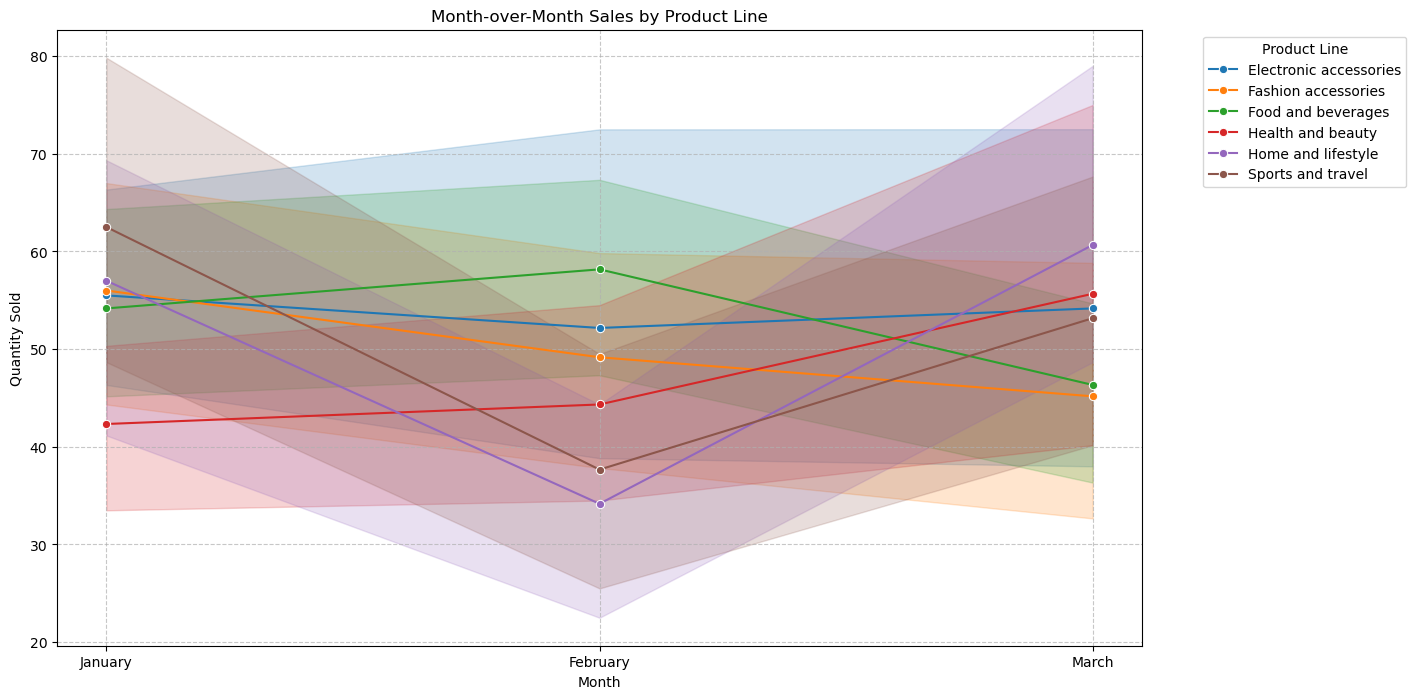

In [81]:
# Line plot for Sales (Quantity) by Product Line
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped, x='Month', y='Quantity', hue='Product line', marker='o', palette='tab10')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Month-over-Month Sales by Product Line')
plt.xticks(range(1, 4), ['January', 'February', 'March'])
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

i can see sales of electronic accessories is quite constant compare to other product line

sales of Fashion accessories has decreased

also food and beverages littelbit increased during jan to feb but then decreased

for health and beuty incresed from feb to march

for home and lifestyle decrease in jan to feb but from feb to march increased 

for Sports and travel decrease in jan to feb but from feb to march increased but still not same as jan

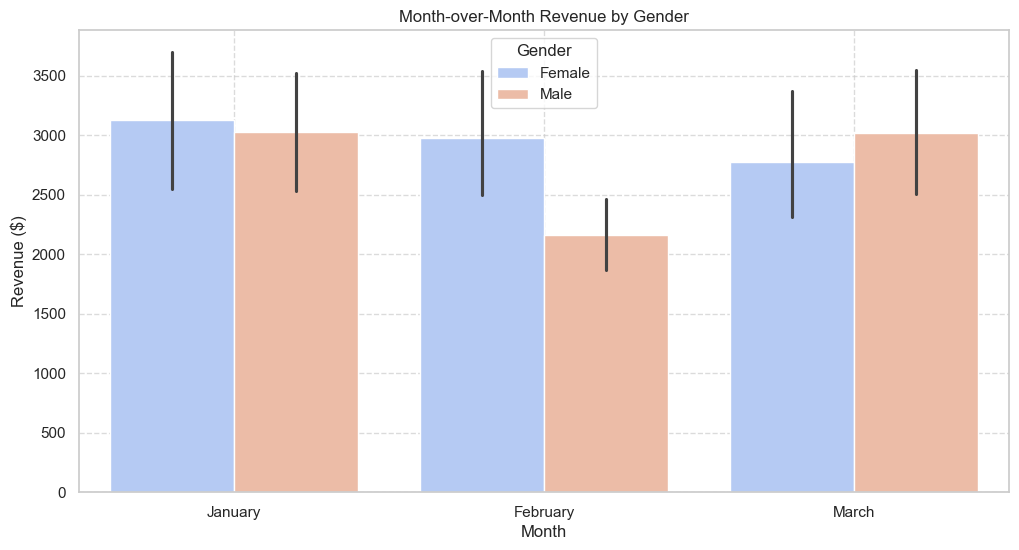

In [38]:
# Bar plot for Revenue by Gender
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Month', y='Revenue', hue='Gender', palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.title('Month-over-Month Revenue by Gender')
plt.xticks(range(0, 3), ['January', 'February', 'March'])
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.show()

i can see in jan and feb more females contributing to revenue but in march male contribution is more than female 

in feb number of male contribution is decreased and in march it is same as jan

female contribution is decreased slowly month by month

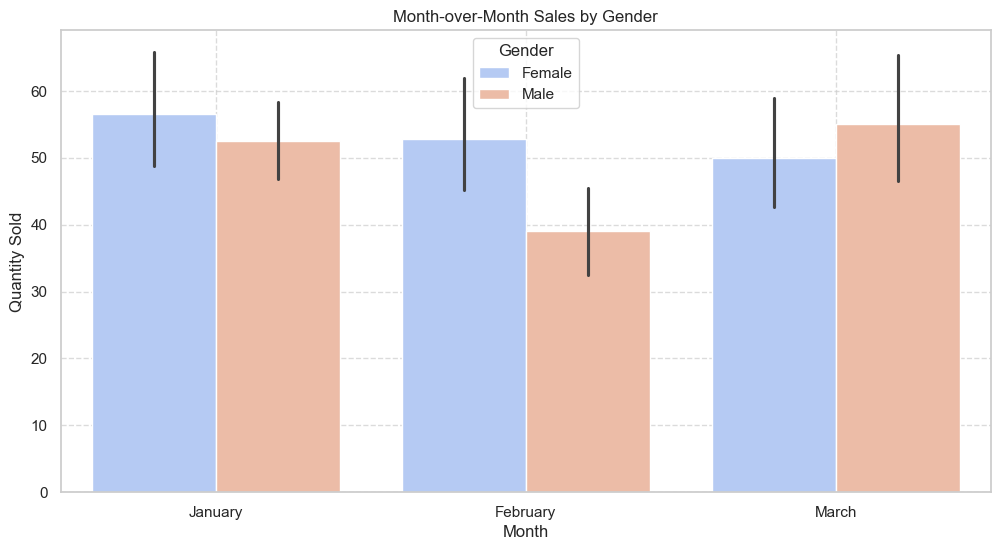

In [39]:
# Bar plot for Sales by Gender
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Month', y='Quantity', hue='Gender', palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Month-over-Month Sales by Gender')
plt.xticks(range(0, 3), ['January', 'February', 'March'])
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.show()

sales by gender is following same trend as revenue by gender

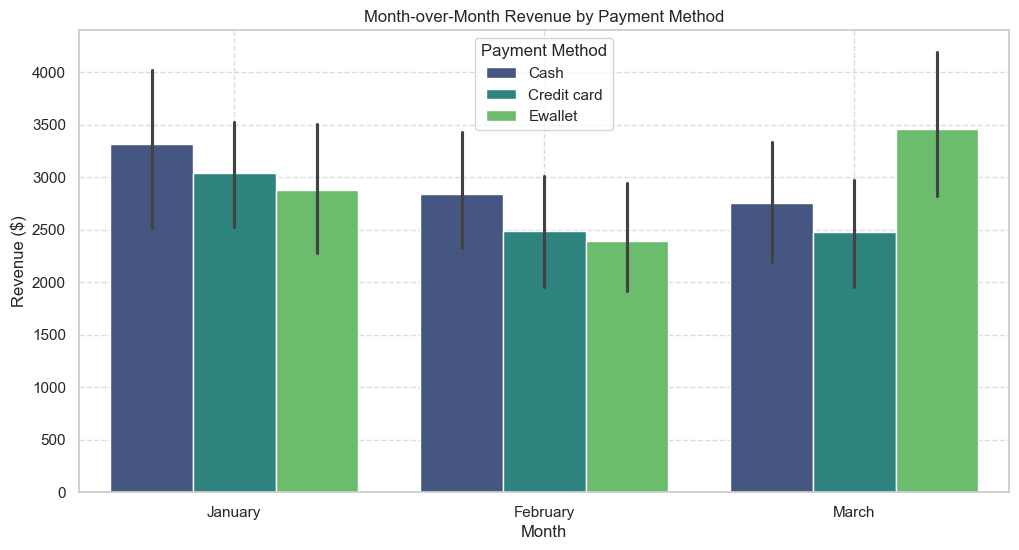

In [40]:
# Bar plot for Revenue by Payment Method
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Month', y='Revenue', hue='Payment', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.title('Month-over-Month Revenue by Payment Method')
plt.xticks(range(0, 3), ['January', 'February', 'March'])
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Payment Method')
plt.show()

i can see month of jan and feb has same trend more revenue is generated by cash compare to credit card and Ewallet
in month of march trend has changed and number of customer who use Ewallet has increased compare to credit card and cash

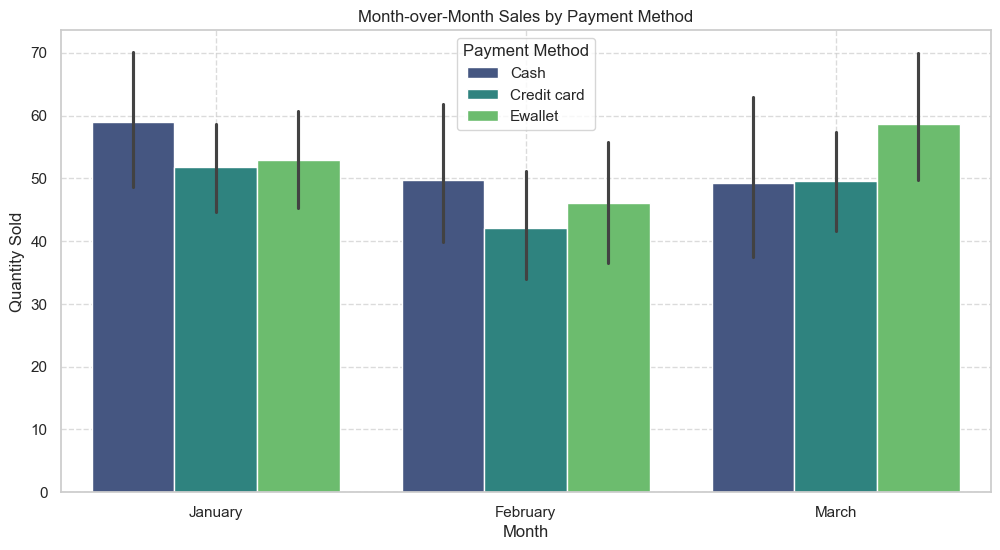

In [41]:
# Bar plot for Sales by Payment Method
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='Month', y='Quantity', hue='Payment', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.title('Month-over-Month Sales by Payment Method')
plt.xticks(range(0, 3), ['January', 'February', 'March'])
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(title='Payment Method')
plt.show()

it is also following same trend as revenue trend

**Summary Focus Areas for April:** 

1. Address declining sales in Fashion Accessories with promotions, product updates, and targeted campaigns.
2. Capitalize on growth in Health & Beauty through focused marketing and cross-selling with other categories.
3.	Promote sports & travel products for the upcoming spring season and continue to build on the recovery in home & lifestyle.
4.	Target male customers with specific campaigns and re-engage female customers with tailored offers.
5.	Encourage digital payments by offering incentives for credit card and e-wallet usage.
6.	Leverage seasonal marketing for spring and run promotions to drive sales across categories.
7.	Focus on customer retention through loyalty programs and personalized communication.

By strategically focusing on these areas, you can set up a robust plan for driving better sales in April. 

# 2. App Exploration: (5 marks)
**Explore the features and user experience of the Jar app. Identify two aspects that
 you think could be significantly improved and explain your reasoning behind each
suggestion.**

## Answer

### Suggestion 1: Improve the Speed and Control of the Onboarding Slides

One of the key areas for improvement in the Jar app is the speed at which the onboarding slides transition. After the initial sign-up or login, the app displays a series of fast-moving sliding tiles. While the intention is likely to give new users a quick overview of the app’s features, the current pace can be overwhelming for many users. Information appears too quickly, leaving little time for users to fully absorb or process the key features being introduced.

### Suggestion 2: Prioritize Pure Gold Jewelry in the Nek Dashboard for a More Streamlined Shopping Experience

Another area of improvement within the Jar app is the presentation of jewelry items in the "Nek Dashboard." Upon clicking the Nek Dashboard button, users are presented with a range of jewelry pieces. However, the initial selection tends to feature gold-plated items at the top, with pure gold pieces appearing further down the list.

For users who are specifically interested in purchasing high-quality, pure gold jewelry, this arrangement can be inefficient. As a user, especially when engaging with a savings or investment-focused app like Jar, I expect the app to highlight pure gold jewelry as the default option, rather than showing gold-plated items first. This would align better with user preferences and expectations, providing a more seamless and satisfying shopping and saving experience.

# 3. Product Optimisation: (5 marks)

**The Jar app has an engagement feature called 'Spin to Win'
.
Right now, if 100 people come to the app each day, only 23 of them try out this
spinning game. But, we know that people who spin are more likely to retain on the
app and do transactions.
Now, we want to get more people to play the game. So, the question is, how can we
make sure that at least 50 people out of every 100 who visit the app each day will
play 'Spin to Win'? What can we do to get more people interested in spinning the
wheel?**

### Issue

To increase the number of people engaging with the "Spin to Win" feature on the Jar app, it's important to make the feature more visible, engaging, and accessible. Based on your observation that the feature is difficult to find and doesn’t immediately catched my  attention 
here are some product optimization strategies that could drive more users to engage with the feature

### Solutions: 
1. Promote the Spin to Win feature more prominently on the home screen or in an easily accessible part of the app interface.
2. Place a banner at the top of the home screen or use a persistent, non-intrusive pop-up(that appears after a few seconds of use) to draw attention to the game. The pop-up could be something like: "Spin to Win - Claim Your Prize!" with an eye-catching design
3. Use gamification principles to make the feature feel like a fun, rewarding challenge. For instance, a daily reminder or notification: “Spin to Win and get a chance to win extra savings today!”